In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import math
from shapely.geometry import Polygon, box
import matplotlib.pyplot as plt

# Plot predictions from the output of a model

## Get columns from original kde probability labels

In [2]:
BUCKET_NAME = 'datasets-sdm'
folder = 'kde/ca'
filename = 'geolifeclef_ca_0.05deg_kde_0.5deg_epanechnikov.pkl'

s3_original_kde_path = 's3://{}/{}/{}'.format(BUCKET_NAME, folder, filename)
print(s3_original_kde_path)

s3://datasets-sdm/kde/ca/geolifeclef_ca_0.05deg_kde_0.5deg_epanechnikov.pkl


In [3]:
kde_original = pd.read_pickle(s3_original_kde_path)
kde_original = kde_original
kde_original.head()

,geometry,grid_id,prob_4911,prob_4912,prob_4922,prob_4923,prob_2329,prob_4927,prob_4930,prob_4382,...,prob_14228,prob_202,prob_9006,prob_272,prob_16726,prob_17029,prob_8230,prob_13366,prob_16533,prob_1455
0,"POLYGON ((-124.36556 40.23088, -124.36556 40.2...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"POLYGON ((-124.36556 40.28088, -124.36556 40.3...",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"POLYGON ((-124.36556 40.33088, -124.36556 40.3...",2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"POLYGON ((-124.36556 40.38088, -124.36556 40.4...",3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"POLYGON ((-124.36556 40.43088, -124.36556 40.4...",4,0,0,24,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
relevant_columns =  kde_original.columns[2:]
relevant_columns

Index(['prob_4911', 'prob_4912', 'prob_4922', 'prob_4923', 'prob_2329',
       'prob_4927', 'prob_4930', 'prob_4382', 'prob_4937', 'prob_4941',
       ...
       'prob_14228', 'prob_202', 'prob_9006', 'prob_272', 'prob_16726',
       'prob_17029', 'prob_8230', 'prob_13366', 'prob_16533', 'prob_1455'],
      dtype='object', length=5079)

Test plot

<AxesSubplot:>

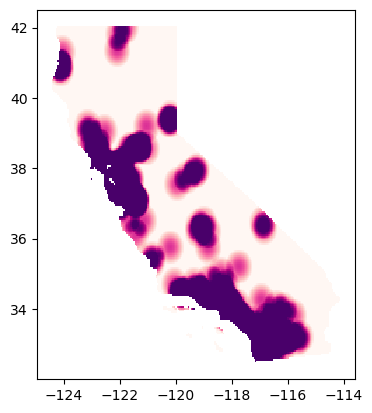

In [5]:
kde_original.plot(column='prob_4922', cmap='RdPu')

In [6]:
kde_geoms = kde_original[['grid_id','geometry']]
kde_geoms

,grid_id,geometry
0,0,"POLYGON ((-124.36556 40.23088, -124.36556 40.2..."
1,1,"POLYGON ((-124.36556 40.28088, -124.36556 40.3..."
2,2,"POLYGON ((-124.36556 40.33088, -124.36556 40.3..."
3,3,"POLYGON ((-124.36556 40.38088, -124.36556 40.4..."
4,4,"POLYGON ((-124.36556 40.43088, -124.36556 40.4..."
...,...,...
17168,17168,"POLYGON ((-114.16556 34.23088, -114.16556 34.2..."
17169,17169,"POLYGON ((-114.16556 34.28088, -114.16556 34.3..."
17170,17170,"POLYGON ((-114.16556 34.33088, -114.16556 34.3..."
17171,17171,"POLYGON ((-114.11556 34.23088, -114.11556 34.2..."


## Read in saved numpy file that has the labels

In [7]:
predictions_point1_kde = np.load('ca_predictions_0.1deg.npy')
predictions_point5_kde = np.load('ca_predictions_0.5deg.npy')

In [8]:
predictions_point1_kde.shape, predictions_point5_kde.shape

((17173, 5079), (17173, 5079))

In [9]:
predict_df1 = pd.DataFrame(predictions_point1_kde, columns=relevant_columns)
predict_df5 = pd.DataFrame(predictions_point5_kde, columns=relevant_columns)
# predict_df

In [10]:
predict_df5.reset_index(inplace=True)
predict_df5 = predict_df5.rename(columns = {'index':'grid_id'})
predict_df1.reset_index(inplace=True)
predict_df1 = predict_df1.rename(columns = {'index':'grid_id'})

In [11]:
# predict_df

In [12]:
prediction_gdf1 = kde_geoms.merge(predict_df1, on='grid_id')
prediction_gdf5 = kde_geoms.merge(predict_df5, on='grid_id')

In [13]:
# prediction_gdf

<AxesSubplot:>

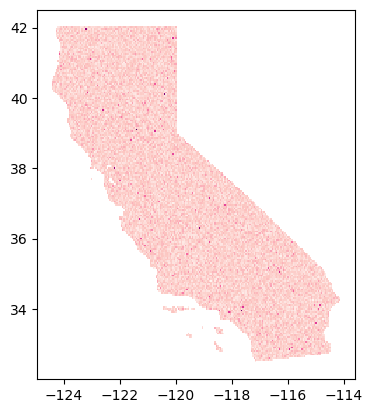

In [13]:
prediction_gdf1.plot(column='prob_5908', cmap='RdPu')

<AxesSubplot:>

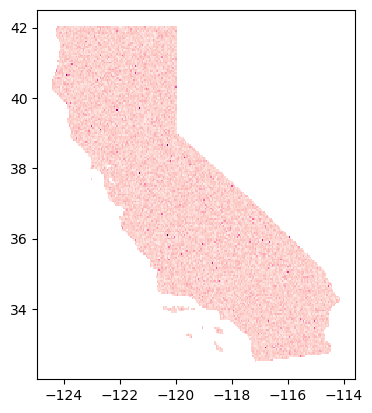

In [14]:
prediction_gdf5.plot(column='prob_5908', cmap='RdPu')

## Read in the original observations for CA

In [15]:
s3_obs_path = 's3://datasets-sdm/geoLifeCLEF/observations/obs_ca_gdf.pkl'
obs_ca_gdf = pd.read_pickle(s3_obs_path)
obs_ca_gdf

,observation_id,species_id,subset,geometry,valid
0,20000173,4911,train,POINT (-116.18068 33.19766),True
1,20000175,4912,train,POINT (-118.87676 34.03797),True
12,20000189,4922,train,POINT (-116.94504 32.72591),True
13,20000190,4923,train,POINT (-117.84243 33.66103),True
16,20000198,2329,train,POINT (-118.16702 34.13520),True
...,...,...,...,...,...
956206,22068149,5908,train,POINT (-117.08572 32.55431),True
956220,22068164,6487,train,POINT (-121.83652 37.19288),True
956223,22068168,9315,train,POINT (-119.47666 34.37289),True
956225,22068170,8451,train,POINT (-122.75866 38.20584),True


<AxesSubplot:>

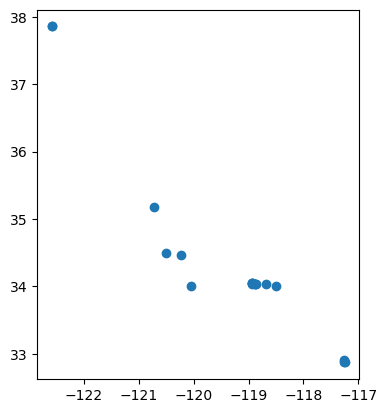

In [16]:
obs_ca_gdf[obs_ca_gdf.species_id==4912].plot()

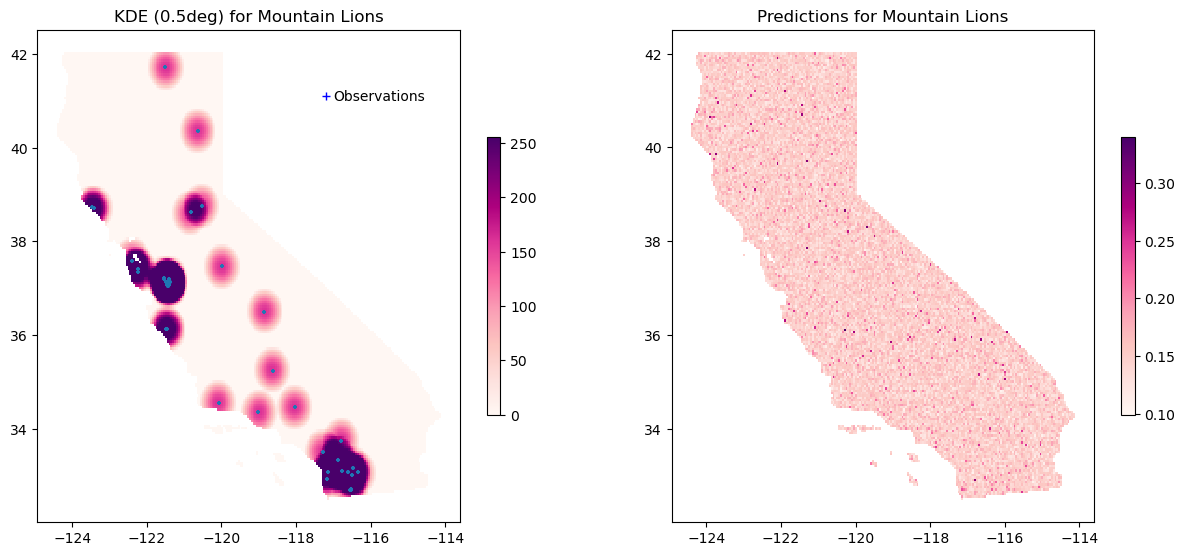

In [18]:
import matplotlib.pyplot as plt
import random

chosen_col ='prob_6942' #mountain Lion

sid = int(chosen_col[5:])

_, axs = plt.subplots(1, 2, figsize=(15, 12))


prediction_gdf5.plot(column=chosen_col, ax=axs[1], legend=True, cmap='RdPu', legend_kwds={'shrink': 0.3})
kde_original.plot(column=chosen_col, ax=axs[0], legend=True, cmap='RdPu', legend_kwds={'shrink': 0.3})
obs_ca_gdf[obs_ca_gdf.species_id==sid].plot(ax=axs[0], marker='+', markersize=5, color='tab:blue')

axs[1].set_title('Predictions for Mountain Lions'.format(sid))
axs[0].set_title('KDE (0.5deg) for Mountain Lions'.format(sid))
axs[0].text(-117, 41,'Observations', fontsize=10)
axs[0].plot(-117.2, 41.1, 'b+')

plt.show()


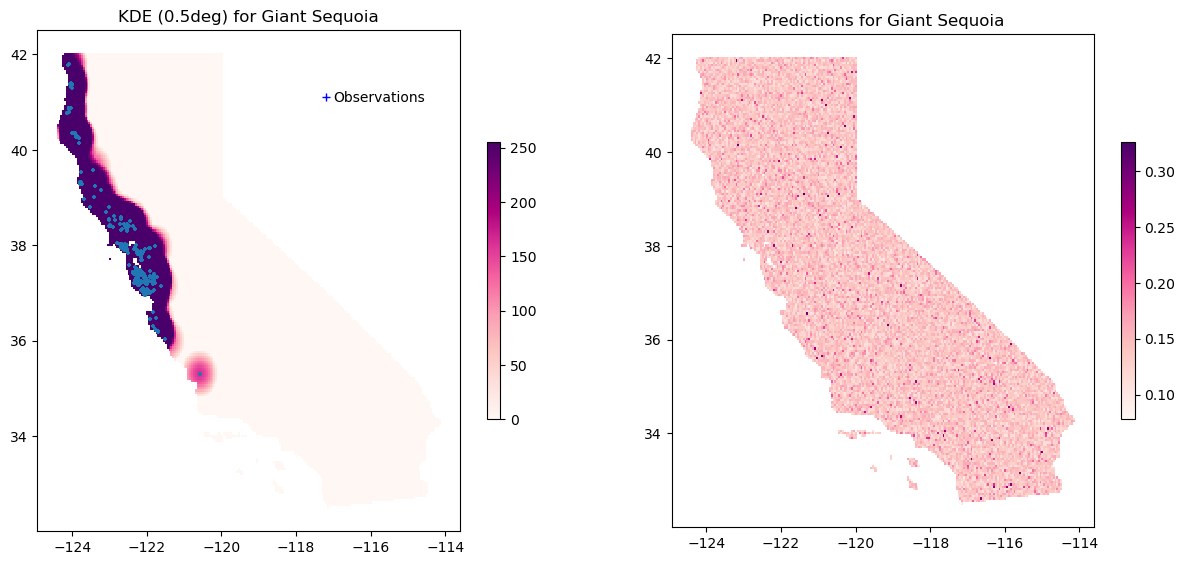

In [26]:

# print(chosen_col)

chosen_col ='prob_2560' 


sid = int(chosen_col[5:])

_, axs = plt.subplots(1, 2, figsize=(15, 12))


prediction_gdf1.plot(column=chosen_col, ax=axs[1], legend=True, cmap='RdPu', legend_kwds={'shrink': 0.3})
kde_original.plot(column=chosen_col, ax=axs[0], legend=True, cmap='RdPu', legend_kwds={'shrink': 0.3})
obs_ca_gdf[obs_ca_gdf.species_id==sid].plot(ax=axs[0], marker='+', markersize=5, color='tab:blue')

axs[1].set_title('Predictions for Giant Sequoia'.format(sid))
axs[0].set_title('KDE (0.5deg) for Giant Sequoia'.format(sid))
axs[0].text(-117, 41,'Observations', fontsize=10)
axs[0].plot(-117.2, 41.1, 'b+')

plt.show()

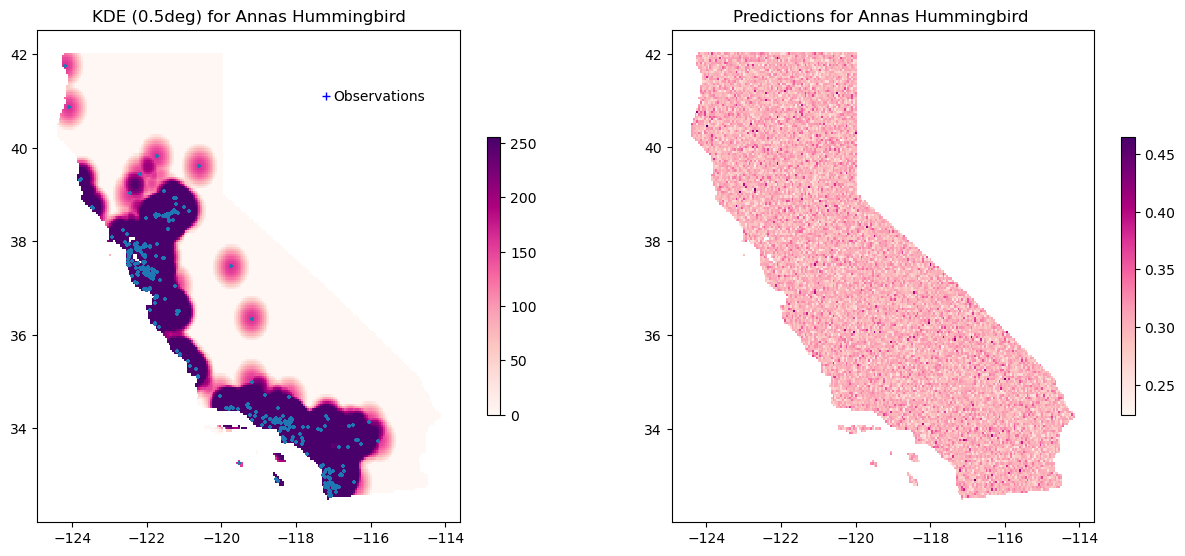

In [28]:

chosen_col ='prob_5396' #mountain Lion

sid = int(chosen_col[5:])

_, axs = plt.subplots(1, 2, figsize=(15, 12))


prediction_gdf5.plot(column=chosen_col, ax=axs[1], legend=True, cmap='RdPu', legend_kwds={'shrink': 0.3})
kde_original.plot(column=chosen_col, ax=axs[0], legend=True, cmap='RdPu', legend_kwds={'shrink': 0.3})
obs_ca_gdf[obs_ca_gdf.species_id==sid].plot(ax=axs[0], marker='+', markersize=5, color='tab:blue')

axs[1].set_title('Predictions for Annas Hummingbird '.format(sid))
axs[0].set_title('KDE (0.5deg) for Annas Hummingbird'.format(sid))
axs[0].text(-117, 41,'Observations', fontsize=10)
axs[0].plot(-117.2, 41.1, 'b+')

plt.show()

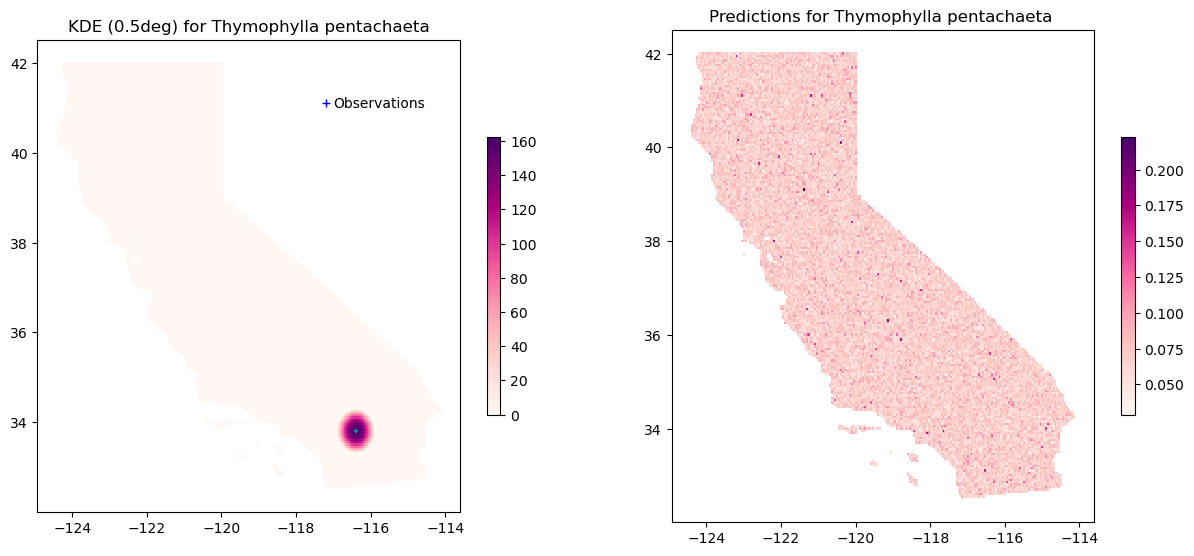

In [22]:
chosen_col ='prob_5367' #mountain Lion

sid = int(chosen_col[5:])

_, axs = plt.subplots(1, 2, figsize=(15, 12))


prediction_gdf1.plot(column=chosen_col, ax=axs[1], legend=True, cmap='RdPu', legend_kwds={'shrink': 0.3})
kde_original.plot(column=chosen_col, ax=axs[0], legend=True, cmap='RdPu', legend_kwds={'shrink': 0.3})
obs_ca_gdf[obs_ca_gdf.species_id==sid].plot(ax=axs[0], marker='+', markersize=5, color='tab:blue')

axs[1].set_title('Predictions for Thymophylla pentachaeta '.format(sid))
axs[0].set_title('KDE (0.5deg) for Thymophylla pentachaeta'.format(sid))
axs[0].text(-117, 41,'Observations', fontsize=10)
axs[0].plot(-117.2, 41.1, 'b+')

plt.show()